# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Aleksandra Baranowska, 253083

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 3

1. Wybór fragmentu sygnału, powtórzenie zamiany czas -> nr próbki/indeks w wektorze
2. Histogram jako wykres statystyczny umożliwiający określenie rozkładu zmiennej.
3. Korelacja jako miara podobieństwa sygnałów
3. Zastosowanie korelacji w systemach radarowych

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [3]:
%pkg install -forge signal
pkg load signal

## Wycinanie fragmentu sygnału

Czasami nie będzie interesował nas cały przebieg sygnału a tylko jego fragment. Musimy zatem umieć odnieść się do pewnej części sygnału i np. zapisać ją do nowej zmiennej, a następnie np. do nowego pliku audio na naszym dysku. W tym miejscu warto zdać sobie sprawę z bardzo istotnej rzeczy czyli tego czym tak naprawdę jest sygnał w pamięci naszego komputera. Skoro jest zapisany w pamięci komputera to muszą to być jakieś liczby. Co więcej to na ostatnich i wcześniejszych jeszcze zajęciach ustaliliśmy, że sygnał składa się z próbek. Patrząc na wygenerowanego i wyrysowanego sinusa możemy stwierdzić, że jest to ciąg punktów na wykresie (więc liczb w pamięci komputera) odpowiadających amplitudom sygnału. Skoro mamy ciąg liczb i chcemy go przechowywać w pamięci komputera to musimy wykorzystać coś co będzie pozwalało na zapisanie więcej niż jednej wartości.
Tak, właśnie! Dokładnie jak się spodziewasz nie jest to nic innego jak tablica jednowymiarowa (wektor) w której przechowywane są wartości sygnału (liczby). Jedynie dzięki znajomości $f_s$ jesteśmy w stanie powiedzieć, że n-ty element tablicy odpowiada konkretnej chwili czasu. Potrafimy zinterpretować dane z którymi pracujemy, natomiast należy pamiętać że w pamięci komputera przechowujemy zwyczajnie wektor z liczbami wewnątrz.

**UWAGA:** Matlab/Octave numeruje elementy tablicy zaczynając od idx=1! (a nie od idx=0 jak... we wszystkich normalnych językach programowania ;))

### Ćwiczenie pierwsze

Np. mamy zespół muzyczny za którym nie przepadamy, ale w nim gra niesamowity pianista. Chcemy posłuchać tylko tego fragmentu kiedy ma swoją solówkę bez irytowania się pozostałą częścią piosenki. Wiemy o tym, że jego solówka zaczyna się w $t_p = 36.85 [s]$ a kończy w $t_k = 58.48 [s]$. Wiedząc o tym, że częstotliwość próbkowania wynosi $f_s$ zastanów się i zapisz w jaki sposób możesz wyciąć ten fragment sygnału w swoim programie komputerowym.

**ODPOWIEDŹ:**

$$N_{start} = round(t_p \cdot f_s) = 36.85 \ cdot f_S$$
$$N_{stop} = round(t_k \cdot f_s) = 58.48 \ cdot f_S$$


`sig_frag = sig(N_start:N_stop)`





#### Zadanie 1

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy dzisiejszym temacie. Pamiętaj o opisaniu wykresu! Skorzystaj z pierwszego pola w funkcji _subplot()_ - będziemy chcieli mieć dwa wykresy pod sobą (dwa wiersze, jedna kolumna).

W drugim polu wykresu wyrysuj fonem  'cz' (na ten moment możesz to trudne słowo interpretować jako coś podobnego do głoski). Czas początku oraz końca fonemu został podany w komórce poniżej.


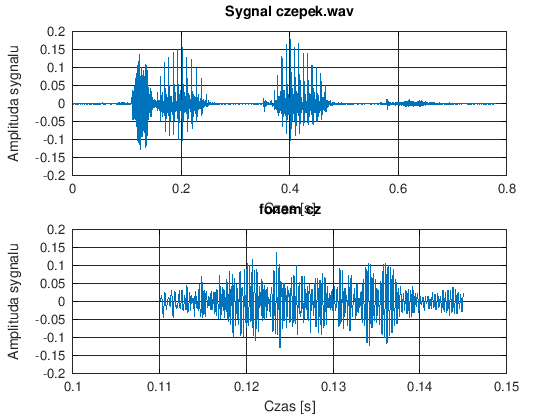

In [5]:
% czas początku i końca dla fonemu 'cz'
tp = 0.11;
tk1 = 0.145;

% TUTAJ MIEJSCE NA DOPISANIE FRAGMENTU

[sig1,fs] = audioread('czepek.wav');

Nstart = round(tp*fs);
Nstop = round(tk1*fs);

sig2 = sig1(Nstart:Nstop);

t1 = (0:size(sig1,1)-1)/fs;
t2 = t1(Nstart:Nstop);

subplot(2,1,1)
plot(t1, sig1);
title('Sygnal czepek.wav')
xlabel('Czas [s]')
ylabel('Amplituda sygnalu')
grid on;

subplot(2,1,2)
plot(t2, sig2);
title('fonem cz');
xlabel('Czas [s]')
ylabel('Amplituda sygnalu')
grid on;




## Histogram

Histogram jest jednym z najbardziej popularnych wykresów statystycznych. Histogram złożony jest zwykle z prostokątnych słupków, które przedstawiają liczebność obserwacji w danym przedziale wartości (u nas sygnału). Inaczej mówiąc wykres ten będzie pokazywał nam jak dużo jest w naszym wektorze wartości amplitudy w przedziałach $[(y_0, y_1), (y_1, y_2), ..., (y_{n-1},y_n)]$, gdzie n to liczba słupków na histogramie. W Matlabie/Octavie do wyrysowania histogramu wykorzystujemy funkcję **`hist()`**. Wykres opisujemy w ten sam sposób jaki poznaliśmy wcześniej, możemy również włączyć siatkę aby łatwiej było odczytywać nam wartości.

**Uwaga**: **`hist` powoduje między innymi wyrysowanie wykresu**, nie piszemy `plot(hist())`!

### Zadanie 2
Histogram służy najczęściej badaczowi do określenia charakteru rozkładu zmiennej. Co to w praktyce oznacza? Przejdźmy do przykładu zdania w którym wykorzystamy histogram aby określić rodzaj szumu, który podrzucił Wam wyjątkowo niemiły prowadzący. Dlaczego niemiły? Bo zamiast nazwać sensownie pliki z danymi nazwał je `szum_1` oraz `szum_2`. A wy musicie wyśledzić z jakim szumem macie do czynienia w każdym z przypadków.
Kilka słów o tym co należy po kolei zrobić:
1. Za pomocą funkcji `load` wczytujemy dwa pliki z szumem do naszego programu. Nazwy zmiennych są tożsame z nazwami pliku (czyli po wykonaniu load mamy w programie dostępne zmienne `szum_1` oraz `szum_2`).
2. Generujemy wektor czasu dla naszego sygnału. Częstotliwość próbkowania wynosi $f_s = 250 [Hz]$, natomiast długość sygnału w próbkach (czyli długość wektora) można sprawdzić za pomocą funkcji **`length()`**. Dla ułatwienia szumy zostały zapisane z taką samą częstotliwością próbkowania i mają tyle samo próbek, więc wystarczy nam jeden wektor czasu.
2. Rysujemy pierwszy podwójny wykres (dwa wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_1 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał 20 słupków.
3. Rysujemy drugi podwójny wykres (dwa wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_2 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał tym razem 10 słupków.
4. Uruchamiamy komórki i poprawiamy tytuły wykresów  (`title()`) na takie, które będą związane z rodzajem wyrysowanego szumu.

Czy patrząc na przebieg czasowy sygnału byłbyś w stanie określić z całą pewnością z jakim szumem masz do czynienia? Co przedstawia histogram i do czego można go wykorzystać?


In [3]:
% dokumentacja do wykorzystywanych funkcji. Aby ją zobaczyć należy odkomentować linijkę która aktualnie Was interesuje
% help load
% help hist

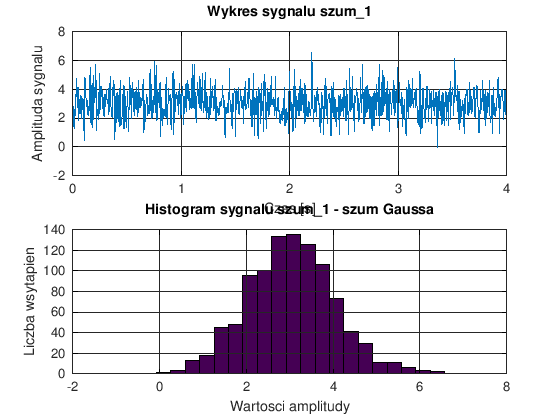

In [7]:
% tutaj jest miejsce na napisanie kodu dla szum_1
% UWAGA: Punkt 1 zostal juz wykonany!

load('szum_1.mat')
fs=250;

delta_t=1/fs;
N = length(szum_1);
t = 0:delta_t:(N-1)*delta_t;

figure
subplot(2,1,1);
plot(t,szum_1);
title('Wykres sygnalu szum\_1');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');
grid on;

subplot(2,1,2);
hist(szum_1,20);
title('Histogram sygnalu szum\_1 - szum Gaussa');
xlabel('Wartosci amplitudy');
ylabel('Liczba wsytapien');
grid on;








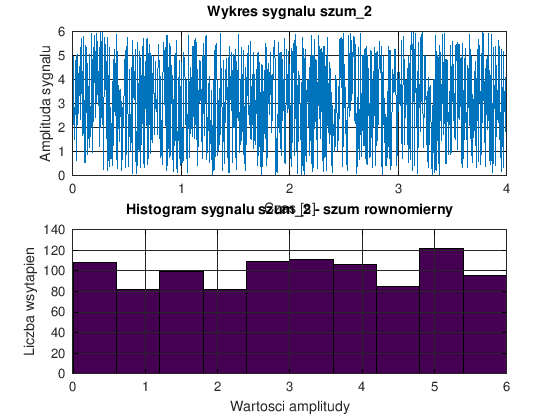

In [8]:
% tutaj jest miejsce na napisanie kodu dla szum_2
% UWAGA: Punkt 1 zostal juz wykonany!

load('szum_2.mat')
fs=250;

delta_t=1/fs;
N = length(szum_2);
t = 0:delta_t:(N-1)*delta_t;

figure
subplot(2,1,1);
plot(t,szum_2);
title('Wykres sygnalu szum\_2');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');
grid on;

subplot(2,1,2);
hist(szum_2,10);
title('Histogram sygnalu szum\_2 - szum rownomierny');
xlabel('Wartosci amplitudy');
ylabel('Liczba wsytapien');
grid on;





## Korelacja

Z pojęciem tym zetknęliście się już na rachunku prawdopodobieństwa  - w statystyce korelacja określać będzie wzajemną zależność zmiennych losowych. Podczas tego kursu będziemy posługiwać się przede wszystkim dwoma pojęciami - autokorelacją oraz korelacją wzajemną. Obie te statystyki będą mówiły nam o tym jak bardzo sygnały są podobne do siebie. Tak jak z nazwy wynika w przypadku autokorelacji będziemy korelować ze sobą ten sam sygnał, a w przypadku korelacji wzajemnej dwa różne sygnały. Korelację oblicza się zgodnie ze wzorem:
$$corr(f,g)[n]\ =\ \sum _{m=-\infty }^{\infty }f[m]\,g[m-n]$$


A teraz dla osób nie tolerujących wzorów ;)

Korelacja to suma wartości obu sygnałów przemnożonych przez siebie. Obliczenia korelacji są wykonywane dla kolejnych wartości przesunięcia czasowego (opóźnienia). Jeden z sygnałów jest przesuwany względem drugiego (w naszym wzorze g względem f) i dla każdego przesunięcia mnożymy przez siebie nakładające się próbki i sumujemy wyniki.

Aby obliczyć korelację (zarówno autokorelację jak i korelację wzajemną) w języku Octave/Matlab będziemy korzystać z funkcji **xcorr()** w wersji **r = xcorr(___,maxlag)**. Link do dokumentacji: https://www.mathworks.com/help/matlab/ref/xcorr.html

___
### Zadanie 3
W poniższej komórce został wygenerowany sygnał sinusoidalny o długości 2 sekund. Oblicz jego autokorelację dla opóźnienia równego $lag_{max} = 1[s]$. Następnie korzystając z funkcji `subplot` wyrysuj jego przebieg czasowy oraz autokorelację. Pamiętaj o poprawnym opisaniu i wyskalowaniu osi oraz tytułach wykresów.



In [16]:
% help xcorr

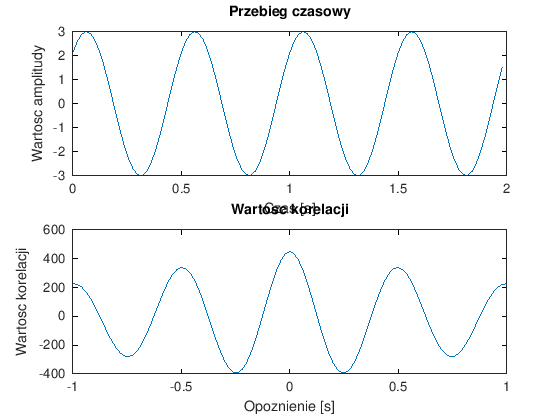

In [6]:
delta_t = 0.02;
fs = 1/delta_t;
t = 0:delta_t:2-delta_t;

A = 3;
f = 2;
phi = pi/4;

signal = A*sin(2*pi*f*t+phi);

% tutaj miejsce na DOPISANIE FRAGMENTU

maxlag_t = 1;
maxlag_N = maxlag_t*fs;

corr_sig = xcorr(signal,signal,maxlag_N);

N_corr = -maxlag_N:1:maxlag_N;
t_corr = -maxlag_t:delta_t:maxlag_t;

subplot(2,1,1);
plot(t, signal);
title('Przebieg czasowy')
xlabel('Czas [s]');
ylabel('Wartosc amplitudy');

subplot(2,1,2);
plot(t_corr, corr_sig);
title('Wartosc korelacji')
xlabel('Opoznienie [s]');
ylabel('Wartosc korelacji');




### Zadanie 4
W nagraniu, o którym mowa była już wcześniej mamy zapisane słowo "czepek". Nasze słowo składa się z 4 fonemów: cz, 2 x e, p, k. **Możemy zatem stwierdzić, że w nagraniu mamy dwa fonemy e. Sprawdźmy zatem jak bardzo są one podobne do siebie.**
Dane które są potrzebne to **początek, koniec obu fonemów oraz maksymalne przesunięcie zostały podane w komórce poniżej**.

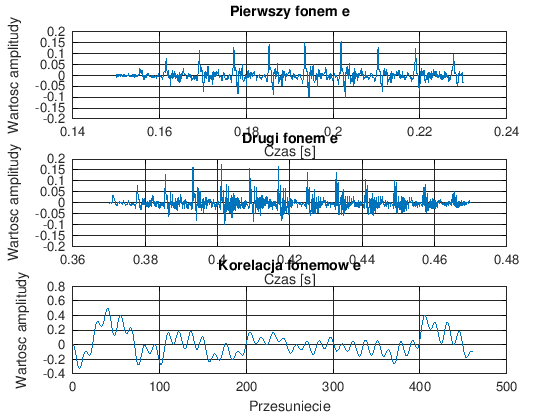

In [13]:
% pierwszy fonem e
tp1 = 0.15;
tk1 = 0.23;

% drugi fonem e
tp2 = 0.37;
tk2 = 0.47;

% maksymalne przesunięcie w próbkach
kmax = 230;

% TUTAJ MIEJSCE NA DOPISANIE FRAGMENTU

[sig1,fs]=audioread('czepek.wav');
delta_t = 1/fs;
N = length(sig1);
t = 0:delta_t:(N-1)*delta_t;

Nstart = round(tp1*fs);
Nstop = round(tk1*fs);

sig2 = sig1(Nstart:Nstop);
t2 = t(Nstart:Nstop);


Nstart = round(tp2*fs);
Nstop = round(tk2*fs);

sig3 = sig1(Nstart:Nstop);
t3 = t(Nstart:Nstop);


corr_sig = xcorr(sig2, sig3, kmax);

figure
subplot(3,1,1);
plot(t2, sig2);
title('Pierwszy fonem e');
xlabel('Czas [s]');
ylabel('Wartosc amplitudy');
grid on;

subplot(3,1,2);
plot(t3, sig3);
title('Drugi fonem e');
xlabel('Czas [s]');
ylabel('Wartosc amplitudy');
grid on;

subplot(3,1,3);
plot(corr_sig);
title('Korelacja fonemow e');
xlabel('Przesuniecie');
ylabel('Wartosc amplitudy');
grid on;

**Jakie są Twoje wnioski?** Czy różne fonemy 'e' są podobne do siebie tak samo mocno co w przypadku obliczenia autokorelacji? Z czego Twoim zdaniem wynika różnica?

**Odpowiedź:**  TUTAJ WPISZ ODPOWIEDŹ

Wystarczą trzy zdania, absolutnie nie zalezy mi na wypracowaniach ;)

## Zaprojektujmy własny radar!

**Gratulacje! Dotarłaś/Dotarłeś już PRAWIE do końca**. Teraz czas na napisanie algorytmu radaru, który pozwoli na wykrycie wrogiego okrętu zanim nikczemni piraci zbliżą się do królewskiej łajby ze zdjęcia poniżej! :D

![krolewna](https://a.allegroimg.com/s190/11ba6b/7c68119148e5b4d24c9480545310/ZESTAW-KLOCKI-jak-LEGO-STATEK-KSIEZNICZKA-ZABAWKI)

A teraz trochę poważniej:

Informacje, które zdobyłaś/zdobyłeś na poprzednich i dzisiejszych zajęciach w zupełności wystarczą do napisania jednej z implementacji radarowych, a mianowicie radaru impulsowego. Radar impulsowy wysyła bardzo krótki sygnał sinusoidalny (np. $\tau = 1 [\mu s]$) o liniowo zmiennej częstotliwości w przestrzeń. Oprócz tego ciągle nasłuchuje i bada podobieństwo między sygnałem modelowym, a aktualnie odbieranym (nazywanym echem). Na podstawie tego ile czasu minęło od wysłania impulsu do momentu powrotu sygnału jesteśmy w stanie określić w jakiej odległości od naszego generatora fali jest przeszkoda.

![radar](https://upload.wikimedia.org/wikipedia/commons/0/07/Radarops.gif)

Sygnałem, który wykorzystywany jest do tworzenia systemów radarowych jest **chirp** nazywany w literaturze również sygnałem świergotowym. Jest to sygnał sinusoidalny, przy czym częstotliwość sygnału nie jest stała lecz wzrasta lub maleje (liniowo lub logarytmicznie). Znając prędkość fali elektromagnetycznej w powietrzu oraz przesunięcia odebranego sygnału względem nadanego możemy wyznaczyć odległość od obiektu.


### Ćwiczenie 2
W celach ćwiczeniowo-demonstracyjnych wygeneruj 2 sekundy sygnału chirp gdzie $f_{start}=2[Hz]$, $f_{stop}=50[Hz]$ oraz $f_s=1000[Hz]$, a czas narastania częstotliwości jest równy czasowi trwania sygnału. Wyrysuj otrzymany sygnał za pomocą funkcji `plot`.


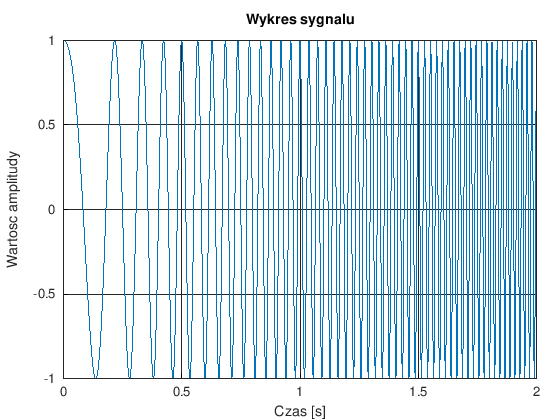

In [10]:
% tutaj jest miejsce na napisanie kodu

fstart = 2;
fstop = 50;
fs = 1000;

delta_t = 1/fs;
t = 0:delta_t:2-delta_t;

sig = chirp(t,fstart,2,fstop);

figure
plot(t,sig);
title('Wykres sygnalu');
xlabel('Czas [s]');
ylabel('Wartosc amplitudy');
grid on;





#### Zadanie 5
Załóżmy, że $f_{start}=100[Hz], f_{stop}=100[MHz], f_s=250[MHz], \tau=1[\mu s]$. Wygeneruj sygnał świergotowy o zadanych parametrach po czym przekaż go do funkcji **radar_echo()**.  Funkcja **radar_echo()** zwraca sygnał, który wrócił do radaru po odbiciu od obiektu. Do wygenerowania sygnału świergotowego wykorzystaj funkcję **chirp()**.
Twoim zadaniem jest napisanie programu w którym wykorzystasz zdobytą wiedzę do obliczenia odległości od obiektu.

In [0]:
% help chirp

In [16]:
% TUTAJ JEST MIEJSCE NA ROZWIĄZANIE ZADANIA Z RADAREM

fstart = 100;
fstop = 100*(10^6);
fs = 250*(10^6);
tau = 1*(10^(-6));

delta_t = 1/fs;
t = 0:delta_t:tau-delta_t;

sig1 = chirp(t,fstart,tau,fstop);
sig2 = radar_echo(sig1);

corr = xcorr(sig1,sig2);

c = 299792458;

[maxvalue, idx] = max(corr);
t = idx*delta_t;

odleglosc = (c*t)/2















odleglosc = 149.90


___